In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.io as scio

In [6]:
datafile = 'C:/Users/dell/Desktop/Indian_pines.mat'
X = scio.loadmat(datafile)
X0 = X['indian_pines']
# Load the  Matlab data file

In [7]:
X0.shape

(145, 145, 220)

In [8]:
X_lin = np.reshape(X0,(-1, 220))
# Reshape the three arrays into two

In [9]:
X_lin.shape

(21025, 220)

In [10]:
X_data = X_lin - X_lin.mean(axis=0)  #Central

# Method 1 : use function PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)         # Band reduction:the number of spectral bands P has be reduced to 3
pca.fit(X_data)                               # Train the object pca with X_data

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_new = pca.transform(X_data)       #Return the new data after reduction
print(pca.explained_variance_)         # Learn about the eigenvalues of the three components

[26797015.92854002  9206230.73341358   585427.90036423]


In [24]:
print(pca.explained_variance_ratio_) 
# The percentage of variance for all features is 0.93517736, meaning that almost all information is retained

[0.68491037 0.23530392 0.01496307]


In [12]:
X_new.shape

(21025, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


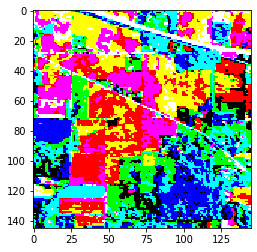

In [13]:
plt.imshow(X_new.reshape(145,145,3))
#Increased spatial resolution.There are three parts,We can clearly distinguish roads, agriculture and forests or other natural perennial vegetation.
#The white straight part is the road.
#The dark color :blue and green is the part of agriculture.About 2/3 of the picture
#The light color :pink and yellow is the part of forest or other natural perennial vegetation.About 1/3 of the picture
#Result: Compared with the original image, we did not lose important information, and successfully reduced dimensionality, and the spatial resolution increased.


In [14]:
#Method2: PAC by hand
X_data = X_lin - X_lin.mean(axis=0)  #Central
n, p = X_data.shape
V = 1/(n-1) * X_data.T@X_data        #Covariance matrix
vp, U = linalg.eigh(V)                      #Eigenvalue and eigenvector
Xpca = X_data@U

In [16]:
print(vp)

[1.57783818e+01 1.64525004e+01 1.70663406e+01 1.73407635e+01
 1.75694444e+01 1.77066070e+01 1.81458444e+01 1.83081722e+01
 1.85812310e+01 1.87341241e+01 1.88220203e+01 1.93408825e+01
 1.95506509e+01 1.96781151e+01 1.98455721e+01 1.99846125e+01
 2.02961981e+01 2.04179349e+01 2.06997707e+01 2.07735706e+01
 2.11072095e+01 2.13791255e+01 2.14902424e+01 2.17762717e+01
 2.20513409e+01 2.21166852e+01 2.22355086e+01 2.23206143e+01
 2.24788640e+01 2.28031541e+01 2.33504504e+01 2.34984845e+01
 2.42356648e+01 2.45417325e+01 2.46161483e+01 2.50747942e+01
 2.52549931e+01 2.55735101e+01 2.58887416e+01 2.64243332e+01
 2.66693454e+01 2.69264941e+01 2.70320582e+01 2.73496797e+01
 2.75090355e+01 2.76403766e+01 2.81799192e+01 2.82673332e+01
 2.87794275e+01 2.90265466e+01 2.91319068e+01 2.93883146e+01
 2.98002259e+01 2.98189224e+01 3.03233936e+01 3.05090437e+01
 3.07707027e+01 3.10732981e+01 3.11756467e+01 3.15062640e+01
 3.15749048e+01 3.20009573e+01 3.21950553e+01 3.22983697e+01
 3.26571337e+01 3.301855

In [17]:
print(vp[217:])                               # We chose the largest three vp
U_pca = U[:,(X_data.shape[1]-3):]
# We can find out the same eigenvalues with the function PCA

[  585427.90036424  9206230.73341356 26797015.92854005]


In [18]:
Xpca = X_data@U_pca

In [19]:
Xpca

array([[  -72.76404299,  1456.88249524,  5014.88994002],
       [ -350.19042559, -2023.43369375,  5601.36588022],
       [ -490.55916296, -3090.38340858,  5796.14487388],
       ...,
       [ -398.17663522, -1132.38668253, -7369.84017524],
       [ -676.84417616,   798.24538296, -6497.10049748],
       [ -465.51154616,   346.75571506, -6570.48578562]])

In [20]:
print( n/ (n-1) *Xpca.std(axis=0)**2)
#The same result with vp. The same eigenvalues

[  585427.90036424  9206230.73341366 26797015.92854001]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


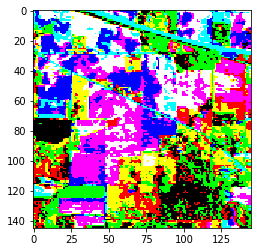

In [21]:
plt.imshow(Xpca.reshape(145,145,3))
#The result of this one is not as good as first one .
#We can also distinguish three parts,but not as clearly as before.
#The darkest part is about 2/3 of the picture:forest.
#The lightest part is about 1/3 of the picture:agriculture
#We can see 2 light blue line as the road.
#Compared the function PCA,not very clear,but also works.

In [22]:
#Method 3:Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_new))
print(scaler.data_max_)
print(scaler.transform(X_new))   #Scaler

MinMaxScaler(copy=True, feature_range=(0, 1))
[13397.38596056 17672.51370034  7107.58801193]
[[0.66223241 0.53276396 0.24729133]
 [0.6858641  0.43248237 0.27697526]
 [0.6937126  0.40173936 0.29199437]
 ...
 [0.16319722 0.45815694 0.28210966]
 [0.19836374 0.51378603 0.3119264 ]
 [0.19540672 0.50077684 0.28931433]]


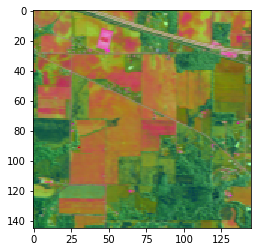

In [101]:
X_new_scaler = scaler.transform(X_new)
plt.imshow(X_new_scaler.reshape(145,145,3))
#This rusult is the most clear one.We can clearly distinguish the boundaries of the region.
#We can draw such a conclusion:Its more handy to rescale the data by making them belong the some specific range.